In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/autism_dataset'  # ganti dengan path yang sesuai di Google Drive Anda
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 202 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 47s - loss: 1.3024 - accuracy: 0.5714 - val_loss: 0.6941 - val_accuracy: 0.4500 - 47s/epoch - 2s/step
Epoch 2/25
25/25 - 38s - loss: 0.6952 - accuracy: 0.3800 - val_loss: 0.6931 - val_accuracy: 0.5500 - 38s/epoch - 2s/step
Epoch 3/25
25/25 - 25s - loss: 0.6933 - accuracy: 0.4000 - val_loss: 0.6932 - val_accuracy: 0.3500 - 25s/epoch - 1s/step
Epoch 4/25
25/25 - 21s - loss: 0.6930 - accuracy: 0.5408 - val_loss: 0.6932 - val_accuracy: 0.5000 - 21s/epoch - 838ms/step
Epoch 5/25
25/25 - 24s - loss: 0.6925 - accuracy: 0.5510 - val_loss: 0.6932 - val_accuracy: 0.5000 - 24s/epoch - 969ms/step
Epoch 6/25
25/25 - 22s - loss: 0.6922 - accuracy: 0.5400 - val_loss: 0.6947 - val_accuracy: 0.4500 - 22s/epoch - 880ms/step
Epoch 7/25
25/25 - 17s - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6915 - val_accuracy: 0.5500 - 17s/epoch - 699ms/step
Epoch 8/25
25/25 - 17s - loss: 0.6914 - accuracy: 0.5400 - val_loss: 0.6880 - val_accuracy: 0.5500 - 17s/epoch - 678ms/step
Epoch 9/25
25/25 

Saving 70610.jpg to 70610 (1).jpg
1/1 [==============================] - 0s 41ms/step
70610 (1).jpg
non_autistic


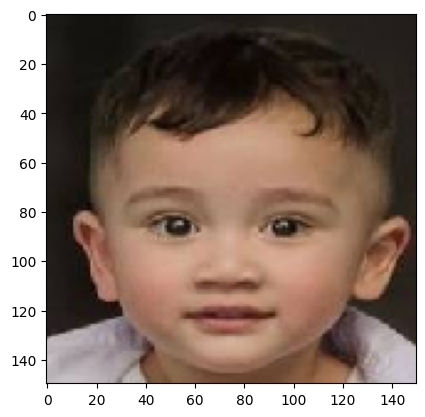

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==1:
   print('autistic')
  else:
   print('non_autistic')